# Gradient Descent Optimization

## Table of contents:
* [Vanilla Gradient Descent](#vanilla)
* [Stochastic Gradient Descent](#sgd)
* [Minibatch Gradient Descent](#minibatch)
* [Momentum](#momentum)
* [Nesterov Momentum](#nag)
* [Adagrad](#nag)
* [RMS Prop](#rms)
* [Adam](#adam)

# Non-linear logistic regression

In the linear logistic regressions for 2-class classifications, we employed such bases, using $\mathbf{x} \leftarrow \big[1, \mathbf{x}^{T} \big]^{T}$ and $\mathbf{\phi} \leftarrow \big[\phi_{0},\mathbf{\phi}^{T} \big]^{T}$,

$$\begin{align}
p(w=1|\mathbf{x}, \mathbf{\phi}) \quad & = &\quad Bern_{w}\bigg[ sig\big[\mathbf{\phi}^{T}
\mathbf{x}\big]\bigg]\\
p(w=0|\mathbf{x}, \mathbf{\phi}) \quad & = &\quad 1 - Bern_{w}\bigg[ sig\big[\mathbf{\phi}^{T}
\mathbf{x}\big]\bigg]\\
sig\big[\mathbf{\phi}^{T}\mathbf{x}\big] \quad & = &\quad  \frac{1}{1 + exp(-\mathbf{\phi}^{T}\mathbf{x})}\\
Bern_{w}(\mathbf{a}) \quad & = &\quad \prod_{i}^{N} a_{i}^{w_{i}}(1 - a_{i})^{1 - w_{i}}
\end{align}$$

We extend the linear logistic regressions to employ non-linear bases.

$$\begin{align}
p(w=1|\mathbf{z}, \mathbf{\phi}) \quad & = &\quad Bern_{w}\bigg[ sig\big[\mathbf{\phi}^{T}
\mathbf{z}\big]\bigg]\\
p(w=0|\mathbf{z}, \mathbf{\phi}) \quad & = &\quad 1 - Bern_{w}\bigg[ sig\big[\mathbf{\phi}^{T}
\mathbf{z}\big]\bigg]\\
sig\big[\mathbf{\phi}^{T}\mathbf{z}\big] \quad & = &\quad  \frac{1}{1 + exp(-\mathbf{\phi}^{T}\mathbf{z})}
\end{align}$$

Here, for a choice of $K$ and $f$,

$$\begin{align}
\mathbf{z} \quad & = &\quad \big[1, f_{1}(\mathbf{x}), \cdots, f_{K}(\mathbf{x})\big]^{T}
\end{align}$$

Among the choice of $f$'s,

$$\begin{align}
z_{k} \quad & = &\quad heaviside[\mathbf{\alpha}_{k}^{T}\mathbf{x}] \quad & = &\quad 1 \quad if \quad \mathbf{\alpha}_{k}^{T}\mathbf{x} > 0 \quad and \quad 0 \quad otherwise\\
z_{k} \quad & = &\quad arctan[\mathbf{\alpha}_{k}^{T}\mathbf{x}]\\
z_{k} \quad & = &\quad gaussian[\mathbf{\alpha}_{k}^{T}\mathbf{x}, \lambda] \quad & = &\quad exp\bigg(-\frac{(\mathbf{x} - \alpha_{k})^{T}(\mathbf{x} - \alpha_{k})}{2\lambda}\bigg)
\end{align}$$

Let us concatenate all the parameters.

$$\begin{align}
\mathbf{\theta} \quad & = &\quad \big[\mathbf{\phi}^{T}, \mathbf{\alpha}_{1}^{T}, \cdots,  \mathbf{\alpha}_{K}^{T} \big]^{T}
\quad & = &\quad \big[\phi_{0}, \phi_{1}, \cdots, \phi_{K}, \alpha_{1, 1}, \cdots, \alpha_{D, 1}, \cdots, \alpha_{1, K}, \cdots, \alpha_{D, K} \big] \quad \Rightarrow \quad _{(K+1 + KD) \times 1}\\
\end{align}$$

We can choose the loglikelihood as the logistic cost function.

$$\begin{align}
L(\mathbf{\theta}) \quad & = &\quad log \bigg[Bern_{w}(\mathbf{a}) \bigg]\\
 \quad & = &\quad \sum_{i}^{N} w_{i}log(a_{i}) + (1 - w_{i})log(1 - a_{i}) \\
 \quad & = &\quad \sum_{i}^{N} w_{i}log\bigg(\frac{1}{1 + exp(-\mathbf{\phi}^{T}\mathbf{z_{i}})}\bigg) + (1 - w_{i})log \bigg( \frac{exp(-\mathbf{\phi}^{T}\mathbf{z_{i}})}{1 + exp(-\mathbf{\phi}^{T}\mathbf{z_{i}})} \bigg) \\
\end{align}$$

Let us write the following explicitly for the case of $z_{i, k} = gaussian[\mathbf{\alpha}_{k}^{T}\mathbf{x}_{i}, \lambda]$

$$\begin{align}
a_{i} \quad & = &\quad \mathbf{\phi}^{T}\mathbf{z_{i}} \quad & = &\quad \sum_{k=0}^{K} \phi_{k}z_{i,k} \quad & = &\quad \phi_{0} + \sum_{k=1}^{K} \phi_{k} z_{i,k}
\end{align}$$

In order to minimize the cost function, we employ gradient descents which requires first order derivative of the cost function with respect to the parameters.

$$\begin{align}
\frac{\partial L(\mathbf{\theta})}{\partial\theta_{j}} \quad & = &\quad - \sum_{i}^{N} ( w_{i} - sig[a_{i}]) \frac{\partial a_{i}}{\partial\theta_{j}}
\end{align}$$

When $z_{k} = gaussian[\mathbf{\alpha}_{k}^{T}\mathbf{x}, \lambda]$,

$$\begin{align}
z_{k} \quad & = &\quad exp\bigg(-\frac{(\mathbf{x} - \alpha_{k})^{T}(\mathbf{x} - \alpha_{k})}{2\lambda}\bigg)\\
a_{i} \quad & = &\quad \phi_{0} + \sum_{k=1}^{K} \phi_{k} exp\bigg(-\frac{1}{\lambda}\sum_{d=1}^{D} ({x}_{i, d} - \alpha_{d, k})^{2}\bigg)
\end{align}$$

The gradients are

$$\begin{align}
\frac{\partial a_{i}}{\partial\theta_{\phi}} \quad & \Rightarrow &\quad \frac{\partial a_{i}}{\partial\phi_{k}} \quad & = & \quad \frac{\partial \phi_{k}}{\partial\phi_{k}} z_{i, k} \quad & = & \quad z_{i,k} \quad \Rightarrow \quad _{(K+1) \times N} \\
\frac{\partial a_{i}}{\partial\theta_{\alpha}} \quad & \Rightarrow & \quad \frac{\partial a_{i}}{\partial\mathbf{\alpha}_{dk}} \quad & = & \quad \phi_{k} \frac{\partial z_{i, k}}{\partial\alpha_{dk}} \quad & = & \quad \phi_{k}\bigg[ \frac{z_{i, k}}{\lambda}(x_{i,d} - \alpha_{dk})\bigg] \quad \Rightarrow \quad _{DK \times N}
\end{align}$$

When $z_{k} = arctan[\mathbf{\alpha}_{k}^{T}\mathbf{x}]$,

$$\begin{align}
z_{k} \quad & = &\quad arctan[\mathbf{\alpha}_{k}^{T}\mathbf{x}]\\
a_{i} \quad & = &\quad \phi_{0} + \sum_{k=1}^{K} \phi_{k} arctan \bigg[\alpha_{d, 0}\cdot 1 + \sum_{d=1}^{D} \alpha_{d, k}{x}_{i, d}\bigg]
\end{align}$$

The gradients are

$$\begin{align}
\frac{\partial a_{i}}{\partial\theta_{\phi}} \quad & \Rightarrow &\quad \frac{\partial a_{i}}{\partial\phi_{k}} \quad & = & \quad \frac{\partial \phi_{k}}{\partial\phi_{k}} z_{i, k} \quad & = & \quad z_{i,k} \quad \Rightarrow \quad _{(K+1) \times N} \\
\frac{\partial a_{i}}{\partial\theta_{\alpha}} \quad & \Rightarrow & \quad \frac{\partial a_{i}}{\partial\mathbf{\alpha}_{dk}} \quad & = & \quad \phi_{k} \frac{\partial z_{i, k}}{\partial\alpha_{dk}} \quad & = & \quad \phi_{k}\bigg[ \frac{x_{i, d}}{1 + z_{i, k}^{2}}\bigg] \quad \Rightarrow \quad _{DK \times N}
\end{align}$$

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spsp
import scipy.stats as spst
%matplotlib inline

# usual gangs

In [66]:
def generate_data_set_dim2_nonlinear(ns):
    """
    this function generates a 2d data set of two classes which are linearly separated.
    
    Arguments:
        ns: number of samples
    
    Output:
        ds1: data on the negative side (3, ns). ds1[1] = 0 is the label.
        ds2: data on the positive side (3, ns). ds2[1] = 0 is the label.
        data  : data combined ds1 and ds2 and shuffled. (2, ns)
        label : label combined ds1 and ds2 and shuffled. (2, ns)
        datab : data combined ds1 and ds2 and shuffled. datab[0] = 1 for bias. (3, ns)
    """
    ns_neg1 = int(0.25 * ns)
    ns_neg2 = int(0.25 * ns)
    ns_neg  = ns_neg1 + ns_neg2
    ns_pos1 = int(0.25 * ns)
    ns_pos2 = ns - ns_neg1 - ns_neg2 - ns_pos1
    ns_pos  = ns_pos1 + ns_pos2
    amp = 5.
    mus = amp * np.array([-1., 1., -1., 1.])
    
    dt_neg1 = np.random.standard_t(3, size=ns_neg1) + mus[0]
    dt_neg2 = np.random.standard_t(3, size=ns_neg2) + mus[1]
    ds1x = np.hstack((dt_neg1, dt_neg2))
    ds1y = 1.5 * amp * (np.random.rand(ns_neg) - .5)
    ds1 = np.vstack((ds1x, ds1y))
    
    dt_pos1 = np.random.standard_t(3, size=ns_pos1) + mus[2]
    dt_pos2 = np.random.standard_t(3, size=ns_pos2) + mus[3]
    ds2x = np.hstack((dt_pos1, dt_pos2))
    ds2y = 1.5 * amp * (np.random.rand(ns_pos) - .5)
    ds2 = np.vstack((ds2x, ds2y))
    
    ang = 0.25 * np.pi
    c, s = np.cos(ang), np.sin(ang)
    rot1 = np.array([[c, s], [-s, c]])
    
    ang = -ang
    c, s = np.cos(ang), np.sin(ang)
    rot2 = np.array([[c, s], [-s, c]])
    
    ds1 = np.dot(rot1, ds1)
    ds2 = np.dot(rot2, ds2)
    
    ds1s = np.vstack((ds1, np.zeros(ns_neg)))
    ds2s = np.vstack((ds2, np.ones(ns_pos)))
    ds = np.hstack((ds1s, ds2s))
    np.random.shuffle(ds.T)
    
    data = ds[:2]
    label = ds[2][np.newaxis, :]
    
    datas, mu, sg = scale_coordinates(data)
    ds1s = (ds1[:2] - mu)/sg
    ds2s = (ds2[:2] - mu)/sg
    
    plt.plot(ds1s[0], ds1s[1], 'r.', markersize=3)
    plt.plot(ds2s[0], ds2s[1], 'b.', markersize=3)
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))
    return ds1s, ds2s, datas, label


def plot_decision_boundary_dim2(phi, alp, lmd):
    """
    this function computes sigmoid function
    
    Arguments:
        phi  : phi. (1, (K+1))
        alp  : alpha. (D, K)
        beta : scalar. learning rate.
        lmd  : scalar.
    
    Intermediate:
        dLdt   : ((K+1+KD), 1)
        ddLdtdt: ((K+1+KD), (K+1+KD))
        
    Output:
        theta: (1, (K+1+KD))
    """
    D = alp.shape[0]
    K = alp.shape[1]
    K1 = phi.shape[1]
    N = 201
    nn = N**2
    x = np.linspace(-3, 3, N)
    y = np.linspace(-3, 3, N)
    xg, yg = np.meshgrid(x, y)
    xss = xg.reshape(1, nn)
    yss = yg.reshape(1, nn)
    xys = np.vstack((xss, yss))
    z = radial_basis(xys, alp, lmd, D, K, nn)
    bd = sigmoid(z, phi).reshape(N, N)
    bd = np.flipud(bd)
    plt.imshow(bd, extent=[-3, 3, -3, 3])
    return bd


def scale_coordinates(x):
    mu = x.mean(keepdims=1)
    sg = x.std()
    xs = (x - mu)/sg
    return xs, mu, sg


In [67]:
def radial_basis(x, alp, lmd, D, K, N):
    """
    this function computes sigmoid function
    
    Arguments:
        x:   (D, ns)  D contains bias as well.
        label:   (1, ns)
        phi  :   (1, D)
        alpha:   scalar
        sgp  :   scalar. prior sigma
    
    Output:
        bases: (D, nx).
    """
    assert alp.shape[0] == x.shape[0]
    bases = np.ones((K + 1, N))
    for i in range(1, K + 1):
        bases[i, :] = spst.multivariate_normal.pdf(x.T, mean=alp[:, i-1], cov=lmd*np.eye(D))
    return bases


def dRB_dalp(x, z, alp, lmd, D, K, N):
    """
    this function generates dRB/dalp.
    
    Arguments:
        z  : generated bases including bias at the zeroth row. ((K+1) * N).
        x  : original cooridnates of the samples. (D, N)
        phi: phi. (1, (K+1))
        alp: alpha. (D, K)
        lmd: scalar.

    Output:
        dzdalp: ((KD), N)
    """
    assert alp.shape[0] == x.shape[0]
    xx = np.tile(x, (K, 1))
    alpx = np.reshape(alp.T, (K*D, 1))
    zx = np.kron(z[1:], np.ones((D, 1)))
    dzdalp = (xx - alpx) * zx / lmd
    return dzdalp

In [68]:
def dz_dalp(x, z, alp, lmd, D, K, N):
    """
    this function generates dRB/dalp.
    
    Arguments:
        z  : generated bases including bias at the zeroth row. ((K+1) * N).
        x  : original cooridnates of the samples. (D, N)
        phi: phi. (1, (K+1))
        alp: alpha. (D, K)
        lmd: scalar.

    Output:
        dzdalp: ((KD), N)
    """
    return dRB_dalp(x, z, alp, lmd, D, K, N)


def da_dphi(z):
    """
    this function generates da/dphi.
    
    Arguments:
        z: generated bases including bias at the zeroth row. ((K+1), N).
    
    Output:
        z: da/dphi. ((K+1), N)
    """
    return z


def da_dalp(z, x, phi, alp, lmd, D, K, N):
    """
    this function generates da/dalp.
    
    Arguments:
        z  : generated bases including bias at the zeroth row. ((K+1), N).
        x  : original cooridnates of the samples. (D, N)
        phi: phi. (1, (K+1))
        alp: alpha. (D, K)
        lmd: scalar.
    
    Intermediate:
        phit  : phi_trancated. without bias. (1, K)
        phix  : phi_extended.  (1, KD)
        dzda  : dzdalp. ((KD), N)
        xx    : (K*D, N)
        alpx  : (K*D, 1)

    Output:
        da/dalp: (K*D, N)
    """
    phit = phi[:, 1:]
    dzda = dz_dalp(x, z, alp, lmd, D, K, N)
    phix = np.kron(phit, np.ones((1, D)))
    dadalp = phix.T * dzda
    return dadalp


def da_dtheta(z, x, phi, alp, lmd, D, K, N):
    """
    this function generates da/dtheta.
    
    Arguments:
        z  : generated bases including bias at the zeroth row. ((K+1) * N).
        x  : original cooridnates of the samples. (D, N)
        phi: phi. (1, (K+1))
        alp: alpha. (D, K)
        lmd: scalar.

    Output:
        da/dtheta: ((K+1+KD), N)
    """
    K1 = K + 1
    dadt = np.zeros((K1 + K*D, N))
    dadt[:K1, :] = da_dphi(z)
    dadt[K1:, :] = da_dalp(z, x, phi, alp, lmd, D, K, N)
    return dadt


def dL_dtheta(z, x, w, phi, alp, lmd, D, K, N):
    """
    this function generates dda/dphidalp.
    
    Arguments:
        z  : generated bases including bias at the zeroth row. ((K+1) * N).
        x  : original cooridnates of the samples. (D, N)
        w  : label. (1, N)
        phi: phi. (1, (K+1))
        alp: alpha. (D, K)
        lmd: scalar.
    
    Intermediate:
        sig   : (N, 1)
        dadt  : ((K+1+KD), N)
        dlt   : (1, N)

    Output:
        dLdt: ((K+1+KD), 1)
    """
    dadt = da_dtheta(z, x, phi, alp, lmd, D, K, N)
    sig = sigmoid(z, phi)
    dLdt = np.dot(dadt, w.T - sig)
    dLdt *= -1
    return dLdt

In [113]:
def cost_function(z, w, phi):
    """
    this function computes logistic cost function
    
    Arguments:
        z   :  (K + 1, N)  1 is for bias.
        w   :  (1, N)
        phi :  (1, K + 1)
    
    Output:
        L:     scalar. cost function.
    """
    sig = sigmoid(z, phi)
    wlogsig1 = np.dot(w, np.log(sig))
    wlogsig2 = np.dot(1 - w, np.log(1 - sig))
    L = wlogsig1 + wlogsig2
    return -L

    
def sigmoid(z, phi):
    """
    this function computes sigmoid function
    
    Arguments:
        z   :  (K + 1, N)  1 is for bias.
        phi :  (1, K + 1)
    
    Output:
        sig  :  (N, 1)
    """
    phix = np.dot(phi, z)
    phix[phix > 250] = 250
    phix[phix < -250] = -250
    sig = 1/ (1 + np.exp(-phix))
    return sig.T


def optimization_method(method):
    if method == "vanilla":
        return vanilla_gradient_descent
    else:
        raise KeyError("the method given does not exist.")


def optimization(z, x, w, phi, alp, lmd, sgps, nnn, beta, method):
    """
    this function computes sigmoid function
    
    Arguments:
        z    : generated bases including bias at the zeroth row. ((K+1), N).
        x    : original cooridnates of the samples. (D, N)
        phi  : phi. (1, (K+1))
        alp  : alpha. (D, K)
        beta : scalar. learning rate.
        lmd  : scalar.
        
    Output:
        theta: (1, (K+1+KD))
    """
    D = x.shape[0]
    D1 = D + 1
    K = alp.shape[1]
    K1 = K + 1
    N = x.shape[1]
    dlt = 1
    step = 0
    Ls = np.zeros(nnn)
    alps = np.zeros((nnn, D, K))
    alps[0] = alp
    cost = cost_function(z, w, phi)
    Ls[step] = cost
    update_params = optimization_method(method)
    while dlt > 0.000001:
        temp = cost
        step += 1
        if step == nnn:
            break
        z = radial_basis(x, alp, lmd, D, K, N)
        bt = beta / np.sqrt(step)
        phi, alp = update_params(z, x, w, phi, alp, lmd, sgps, D, K, N, beta)
        cost = cost_function(z, w, phi) 
        alps[step, :, :] = alp
        Ls[step] = cost
        dlt = np.abs(cost - temp)
    theta = np.hstack((phi, alp.T.reshape(1, K*D)))
    param_description(step, theta.squeeze(), lmd, D, K, K1)
    cost = Ls[:step]
    alpss = alps[:step, :, :]
    return phi, alp, theta, cost, step, alpss


def param_description(step, theta, lmd, D, K, K1):
    strng = '{:d} steps done for lambda = {:1.2f}: '.format(step, lmd)
    strng += '\nphi = \n'
    for i in range(K1):
        strng += '{:1.4f}, '.format(theta[i])
    strng += '\nalp = '
    for d in range(D):
        strng += '\n'
        for i in range(K1+d, K1+K*D, D):
            strng += '{:1.4f}, '.format(theta[i])
    strng += '\n'
    print(strng)


def vanilla_gradient_descent(z, x, w, phi, alp, lmd, sgps, D, K, N, beta):
    """
    this function computes sigmoid function
    
    Arguments:
        z    : generated bases including bias at the zeroth row. ((K+1) * N).
        x    : original cooridnates of the samples. (D, N)
        phi  : phi. (1, (K+1))
        alp  : alpha. (D, K)
        beta : scalar. learning rate.
        lmd  : scalar.
    
    Intermediate:
        dLdt   : ((K+1+KD), 1)
        ddLdtdt: ((K+1+KD), (K+1+KD))
        
    Output:
        theta: (1, (K+1+KD))
    """
    K1 = K + 1
    theta = np.hstack((phi, alp.T.reshape(1, K*D)))
    dLdt    = dL_dtheta(z, x, w, phi, alp, lmd, D, K, N)
    theta -= beta * dLdt.T
    phi = theta[0, :K1].reshape(1, K1)
    alp = theta[0, K1:].reshape(K, D).T
    return phi, alp



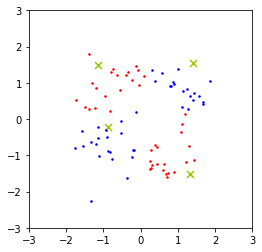

In [106]:
D = 2
K = 4
N = 80
nnn = 10000

plt.rcParams['figure.figsize'] = (4.0, 4.0)
ds1, ds2, x, w = generate_data_set_dim2_nonlinear(N)

alp = 2 * 2 * (np.random.rand(D, K) - 0.5)
plt.scatter(alp[0], alp[1], s=50, c=(0.6, 0.8, 0.), marker='x')

In [108]:
phi = 2 * 2 * (np.random.rand(1, K + 1) - 0.5)

3000 steps done for lambda = 0.20: 
phi = 
-1.4634, 0.3879, 16.8962, 14.8634, -9.0519, 
alp = 
-2.3887, -0.8697, 1.1685, 0.8671, 
2.6761, -0.8278, 0.9807, -0.9012, 

3000 steps done for lambda = 0.50: 
phi = 
-0.5516, -12.0514, 17.6911, 15.6733, -13.4197, 
alp = 
-0.9655, -0.8770, 1.2646, 0.8904, 
1.0503, -0.8866, 1.0657, -1.0216, 

3000 steps done for lambda = 1.00: 
phi = 
-0.1862, -13.7917, 15.4892, 15.3839, -14.4709, 
alp = 
-1.0777, -1.1802, 1.4534, 1.0694, 
1.3103, -1.0610, 1.0945, -1.3338, 

3000 steps done for lambda = 1.50: 
phi = 
-0.0977, -10.1677, 11.0841, 12.5521, -11.1788, 
alp = 
-1.1931, -1.4738, 1.6761, 1.1935, 
1.5481, -1.2211, 1.1661, -1.6079, 

3000 steps done for lambda = 2.00: 
phi = 
-0.0682, -6.6783, 7.3925, 9.6542, -7.9737, 
alp = 
-1.3269, -1.7110, 1.8616, 1.3014, 
1.7398, -1.3747, 1.2621, -1.8244, 



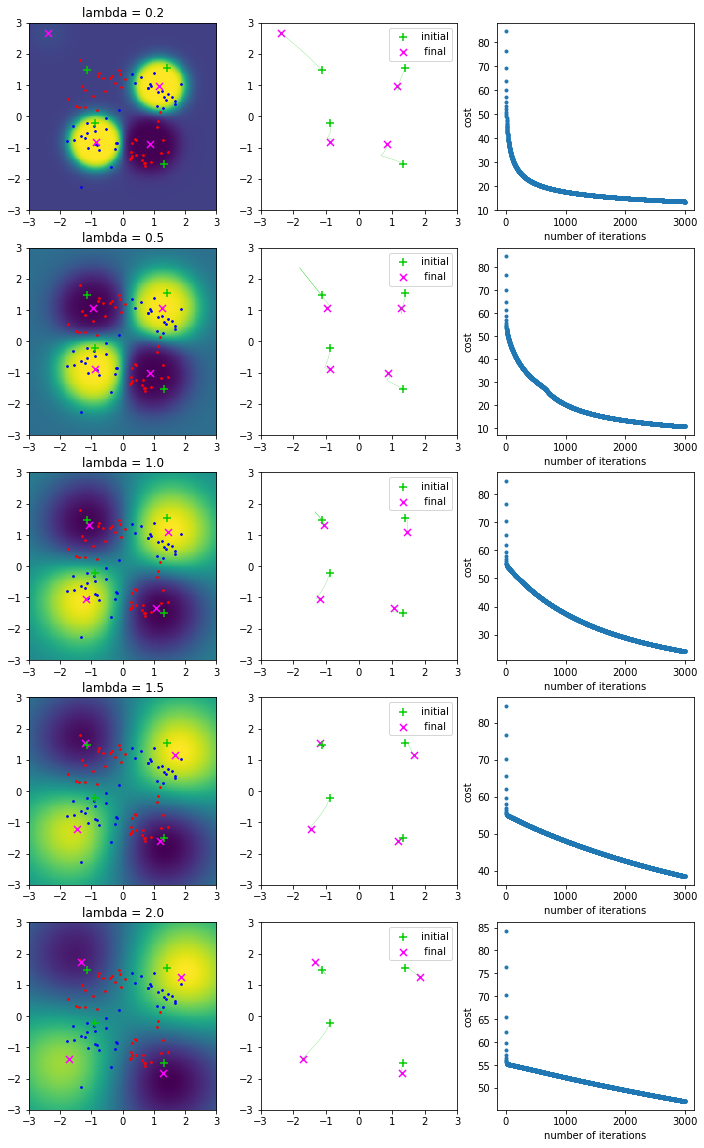

In [109]:
plt.rcParams['figure.figsize'] = (12.0, 20.0)
nnn = 3000
beta = 0.01
sgps = 25.0
lmds = [0.2, 0.5, 1.0, 1.5, 2.0]
ax = 0
for lmd in lmds:
    z = radial_basis(x, alp, lmd, D, K, N)
    phio, alpo, theta, cost, step, alps = optimization(z, x, w, phi, alp, lmd, sgps, nnn, beta, 'vanilla')

    ax += 1
    plt.subplot(5, 3, ax)
    bd = plot_decision_boundary_dim2(phio, alpo, lmd)
    plt.scatter(ds1[0], ds1[1], c=(1., 0., 0.), s=3)
    plt.scatter(ds2[0], ds2[1], c=(0., 0., 1.), s=3)
    plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))
    plt.title('lambda = {}'.format(lmd))

    ax += 1
    plt.subplot(5, 3, ax)
    for k in range(alps.shape[2]):
        plt.plot(alps[:, 0, k], alps[:, 1, k], '-', lw = 0.2, color=(0.0, 0.8, 0.0))
    final = plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    initi = plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.legend([initi, final], ["initial", " final"])
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))

    ax += 1
    plt.subplot(5, 3, ax)
    plt.plot(np.arange(step), cost, '.')
    plt.xlabel('number of iterations')
    plt.ylabel('cost')

10000 steps done for lambda = 0.20: 
phi = 
-1.9303, 0.3332, 28.2416, 23.1796, -13.7522, 
alp = 
-2.4937, -0.9032, 1.1581, 0.9103, 
2.7678, -0.8851, 1.0138, -0.7610, 

10000 steps done for lambda = 0.50: 
phi = 
-0.1908, -22.9448, 25.7870, 21.4107, -23.1343, 
alp = 
-1.0012, -0.8005, 1.2839, 0.8823, 
1.0374, -0.8287, 1.1568, -0.9726, 

10000 steps done for lambda = 1.00: 
phi = 
-0.3360, -27.6275, 30.0176, 27.3927, -27.9589, 
alp = 
-1.1466, -1.0681, 1.4101, 1.0944, 
1.2779, -1.0350, 1.1640, -1.2501, 

10000 steps done for lambda = 1.50: 
phi = 
-0.1745, -26.1292, 27.4806, 27.2798, -26.6190, 
alp = 
-1.2457, -1.3765, 1.6361, 1.2399, 
1.5133, -1.2211, 1.2381, -1.5392, 

10000 steps done for lambda = 2.00: 
phi = 
-0.0956, -21.2187, 21.8142, 23.6337, -22.1082, 
alp = 
-1.3435, -1.6423, 1.8479, 1.3492, 
1.7270, -1.3688, 1.3131, -1.7816, 



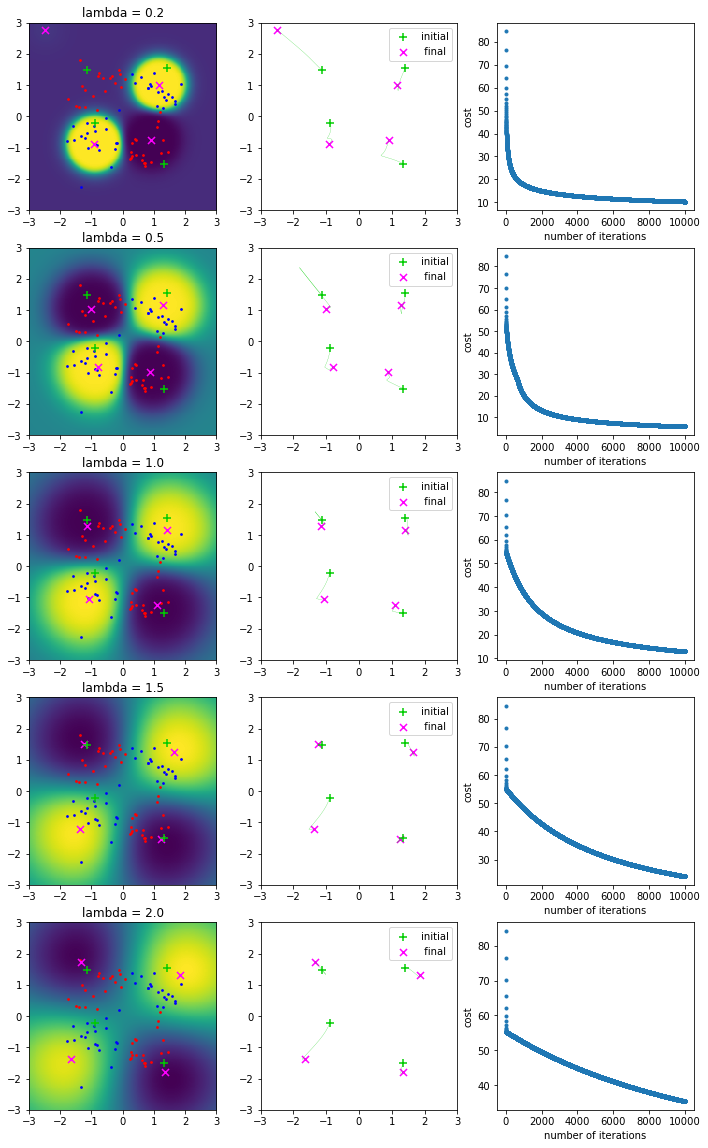

In [111]:
plt.rcParams['figure.figsize'] = (12.0, 20.0)
nnn = 10000
beta = 0.01
sgps = 25.0
lmds = [0.2, 0.5, 1.0, 1.5, 2.0]
ax = 0
for lmd in lmds:
    z = radial_basis(x, alp, lmd, D, K, N)
    phio, alpo, theta, cost, step, alps = optimization(z, x, w, phi, alp, lmd, sgps, nnn, beta, 'vanilla')

    ax += 1
    plt.subplot(5, 3, ax)
    bd = plot_decision_boundary_dim2(phio, alpo, lmd)
    plt.scatter(ds1[0], ds1[1], c=(1., 0., 0.), s=3)
    plt.scatter(ds2[0], ds2[1], c=(0., 0., 1.), s=3)
    plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))
    plt.title('lambda = {}'.format(lmd))

    ax += 1
    plt.subplot(5, 3, ax)
    for k in range(alps.shape[2]):
        plt.plot(alps[:, 0, k], alps[:, 1, k], '-', lw = 0.2, color=(0.0, 0.8, 0.0))
    final = plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    initi = plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.legend([initi, final], ["initial", " final"])
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))

    ax += 1
    plt.subplot(5, 3, ax)
    plt.plot(np.arange(step), cost, '.')
    plt.xlabel('number of iterations')
    plt.ylabel('cost')

3000 steps done for lambda = 0.20: 
phi = 
-0.5963, 0.2761, 17.1641, 15.4255, -10.8657, 
alp = 
-2.6327, -4.0636, 1.1932, 3.5542, 
2.8398, 0.1103, 2.1939, -0.4989, 

3000 steps done for lambda = 0.50: 
phi = 
-0.2867, -20.5427, 18.3262, 19.4013, -16.0559, 
alp = 
-1.4946, -0.4409, 1.0758, 1.5442, 
1.4143, -0.7936, 0.9611, -1.0782, 

3000 steps done for lambda = 1.00: 
phi = 
0.0142, -26.2106, 24.9382, 26.3498, -26.0941, 
alp = 
-1.6167, -0.9300, 1.3234, 1.6026, 
1.8987, -0.8214, 0.9802, -1.8755, 

3000 steps done for lambda = 1.50: 
phi = 
0.1689, -31.5880, 32.6304, 32.5018, -31.9572, 
alp = 
-1.6295, -1.3122, 1.5866, 1.6121, 
1.9857, -1.1277, 1.1667, -2.0207, 

3000 steps done for lambda = 2.00: 
phi = 
-0.1244, -29.1659, 29.9439, 31.0909, -29.8592, 
alp = 
-1.3622, -1.6076, 1.8331, 1.3680, 
1.7156, -1.3675, 1.3377, -1.7607, 



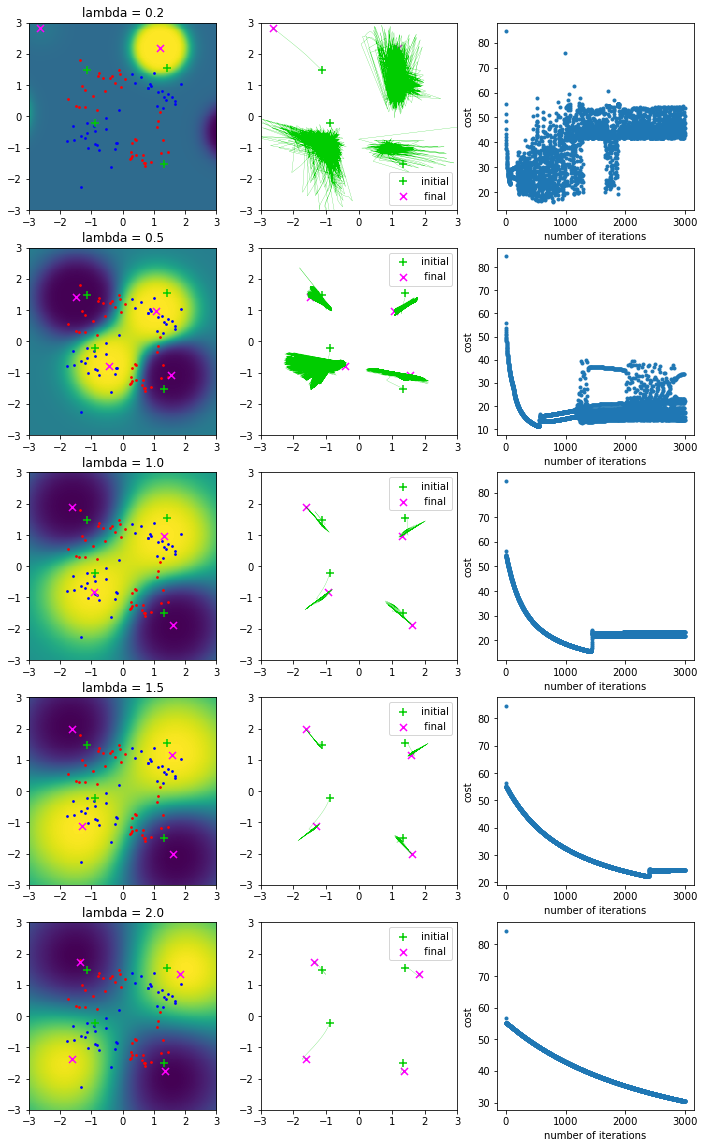

In [110]:
plt.rcParams['figure.figsize'] = (12.0, 20.0)
nnn = 3000
beta = 0.05
sgps = 25.0
lmds = [0.2, 0.5, 1.0, 1.5, 2.0]
ax = 0
for lmd in lmds:
    z = radial_basis(x, alp, lmd, D, K, N)
    phio, alpo, theta, cost, step, alps = optimization(z, x, w, phi, alp, lmd, sgps, nnn, beta, 'vanilla')

    ax += 1
    plt.subplot(5, 3, ax)
    bd = plot_decision_boundary_dim2(phio, alpo, lmd)
    plt.scatter(ds1[0], ds1[1], c=(1., 0., 0.), s=3)
    plt.scatter(ds2[0], ds2[1], c=(0., 0., 1.), s=3)
    plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))
    plt.title('lambda = {}'.format(lmd))

    ax += 1
    plt.subplot(5, 3, ax)
    for k in range(alps.shape[2]):
        plt.plot(alps[:, 0, k], alps[:, 1, k], '-', lw = 0.2, color=(0.0, 0.8, 0.0))
    final = plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    initi = plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.legend([initi, final], ["initial", " final"])
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))

    ax += 1
    plt.subplot(5, 3, ax)
    plt.plot(np.arange(step), cost, '.')
    plt.xlabel('number of iterations')
    plt.ylabel('cost')

3000 steps done for lambda = 0.20: 
phi = 
-0.7098, 0.5389, 5.7075, 5.7225, -3.9008, 
alp = 
-2.0835, -0.8404, 1.1968, 0.7818, 
2.4135, -0.7277, 0.8886, -1.1156, 

3000 steps done for lambda = 0.50: 
phi = 
-0.4374, 0.0152, 4.8083, 5.3210, -3.7702, 
alp = 
-1.8137, -0.9887, 1.2965, 0.8865, 
2.3594, -0.8667, 0.8927, -1.2026, 

3000 steps done for lambda = 1.00: 
phi = 
-0.1359, -0.9291, 2.5314, 3.6878, -2.3926, 
alp = 
-1.2084, -1.2903, 1.4951, 1.0141, 
1.5745, -1.0325, 0.9917, -1.4394, 

3000 steps done for lambda = 1.50: 
phi = 
-0.0911, -0.2056, 1.4218, 2.8183, -1.4991, 
alp = 
-1.1362, -1.2928, 1.6680, 1.1983, 
1.4779, -0.9179, 1.1405, -1.6109, 

3000 steps done for lambda = 2.00: 
phi = 
-0.0809, 0.3256, 0.9472, 2.3547, -1.0166, 
alp = 
-1.0274, -1.1020, 1.7533, 1.3054, 
1.3511, -0.6207, 1.3234, -1.6362, 



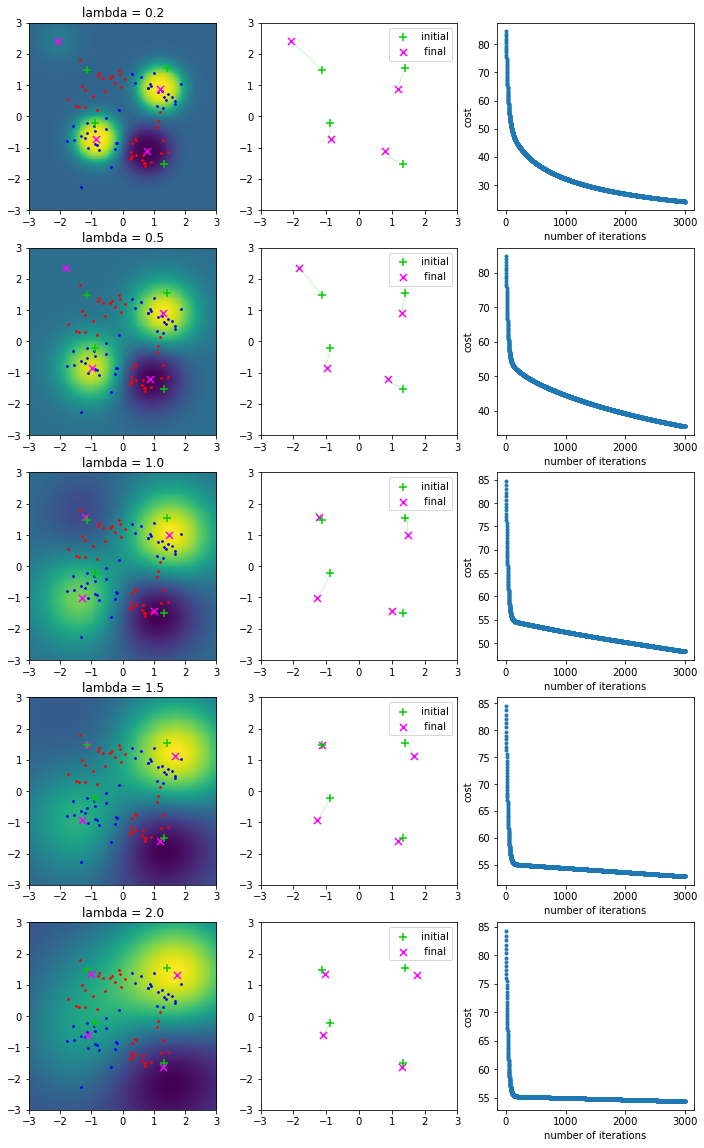

In [112]:
plt.rcParams['figure.figsize'] = (12.0, 20.0)
nnn = 3000
beta = 0.001
sgps = 25.0
lmds = [0.2, 0.5, 1.0, 1.5, 2.0]
ax = 0
for lmd in lmds:
    z = radial_basis(x, alp, lmd, D, K, N)
    phio, alpo, theta, cost, step, alps = optimization(z, x, w, phi, alp, lmd, sgps, nnn, beta, 'vanilla')

    ax += 1
    plt.subplot(5, 3, ax)
    bd = plot_decision_boundary_dim2(phio, alpo, lmd)
    plt.scatter(ds1[0], ds1[1], c=(1., 0., 0.), s=3)
    plt.scatter(ds2[0], ds2[1], c=(0., 0., 1.), s=3)
    plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))
    plt.title('lambda = {}'.format(lmd))

    ax += 1
    plt.subplot(5, 3, ax)
    for k in range(alps.shape[2]):
        plt.plot(alps[:, 0, k], alps[:, 1, k], '-', lw = 0.2, color=(0.0, 0.8, 0.0))
    final = plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    initi = plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.legend([initi, final], ["initial", " final"])
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))

    ax += 1
    plt.subplot(5, 3, ax)
    plt.plot(np.arange(step), cost, '.')
    plt.xlabel('number of iterations')
    plt.ylabel('cost')